# Convoluzione 

Spesso le distribuzioni sperimentali mostrano la combinazione di più effetti *indipendenti*. 


Nel caso discreto, se la variabile $y$ è data dalla somma di due variabili *indipendenti* $x$ e $y$ di conosciamo le distribuzioni di probabilità $P_x(x)$ e $P_y(y)$, possiamo scrivere la distribuzione di $z=x+y$ come:

$\displaystyle P_z(z) = \sum_{x, y:z=x+y}\!\!\! P(x, y) = \sum_{x} P(x, z-x) 
= \sum_{x}P_x(x) P_y(z-x)$

Questo modo di combinare due PDF viene detto **convoluzione**.

Abbiamo già discusso che la somma di due bionomiali con lo stesso parametro $p$ è ancora una binomiale, ossia la *convoluzione* di due binomiali è ancora binomiale.

Ancora, la convoluzione di due poissoniane è ancora una poissoniana.

Esempi di applicazione di convoluzioni discrete sono tipici filtri di immagini: sfocatura, sharpen

* [Image Filtering Using Convolution in OpenCV](https://www.geeksforgeeks.org/image-filtering-using-convolution-in-opencv/)

## Caso contiuo

A due dimensioni, considerando $\varphi: (x,y)\in X\times Y \mapsto z=\varphi(x,y)\in Z$:

$\displaystyle f_z(z) = \frac{\mathrm{d}P(z)}{\mathrm{d}z} = \int\delta(z - \varphi(x,y))\,f_{xy}(x,y)\,\mathrm{d}x\mathrm{d}y$

Se $\varphi(x,y)=x+y$ e se le distribuzioni di $x$ e $y$ sono indipendenti, ossia: 

$f_{xy}(x,y) = f_x(x) f_y(y)$


abbiamo:

$\displaystyle f_z(z) =\int\delta(z - x-y)\,f_{x}(x)f_y(y)\,\mathrm{d}x\mathrm{d}y
= \int\,f_x(x)f_y(x-x)\,\mathrm{d}x
$

Il limite continuo è del tutto simile all'espressione ottenuta nel caso discreto:

$\displaystyle 
f_z(z) = \int_{-\infty}^{+\infty}\!\! f_x(x)\,f_y(z-x)\,\mathrm{d}x
$

Ad esempio, uno spettro che secondo una distrbuzione teorica segue la distribuzione $f(x)$ può essere misurato attraverso uno strumento o un rivelatore che, per ogni valore vero $x$ restituisce una risposta che segue la distribuzione $z$ che segue la distribuzione $g(z; x)$.

In diversi casi, la distribuzione di $z$ $g(z; x)$ dipende da $z$ secondo la differenza $z - x$: $g(z; x)=g(z - x)$. In questo caso, la PDF di $z$ si può scrivere nel modo seguente:

$\displaystyle f(x), g(z-x) \mapsto (f\circledast g)(z) = \int_{-\infty}^{+\infty}\!\! f(x)\, g(z - x)\,\mathrm{d}x$

Possiamo implementare l'integrazione come somma su un numero finito di passi con la funzione [```convolve```](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html).

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import math
sigma = 0.6
def uniform(x):
    return np.array([(1.0 if (5<xx and xx<15) else 0.0) for xx in x])
def gaussian(z):
    return 1/math.sqrt(2*math.pi)/sigma*np.exp(-z**2/2/sigma**2)

In [47]:
f = uniform
g = gaussian
ys = np.linspace(-4, 4, 81)
gys = g(ys)

Calcoliamo i valori della funzione $f$ per punti, e normalizziamo il contenuto.

Se usiamo una Lorenziana, bisogna fare attenzione perché non è integrabile in $]-\infty, +\infty[$, 
ma può essere normalizzata in un intervallo limitato $[a, b]$.

In [49]:
xs = np.linspace(0, 20, 201)
zs = f(xs)
zs/=zs.sum()

Bisogna fare attenzione che l'integrazione richiede la moltiplicazione per $\mathrm{d}x$, che va aggiunto "manualmente" nel codice.

In [50]:
zcs = np.convolve(gys, zs, 'same')
zcs/=zcs.sum()

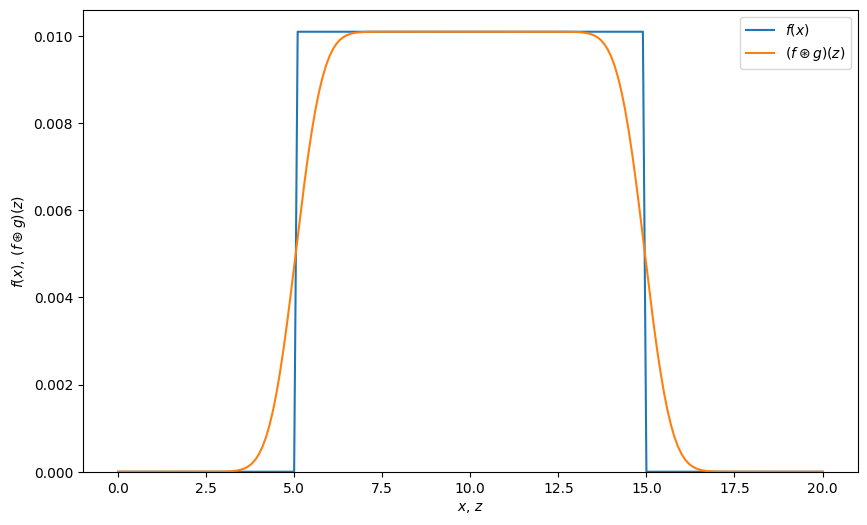

In [52]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs, zs, label='$f(x)$')
plt.plot(xs, zcs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $z$')
plt.ylabel('$f(x)$, $(f\circledast g)(z)$')
plt.ylim(0)
plt.legend()
plt.show()

In [58]:
x0 = 10
gamma = 1.5
def lorentz(x):
    return 1/math.pi * gamma/2 / ((x - x0)**2 + (gamma/2)**2)
f = lorentz
zs = f(xs)
zs/=zs.sum()
zcs = np.convolve(gys, zs, 'same')
zcs/=zcs.sum()

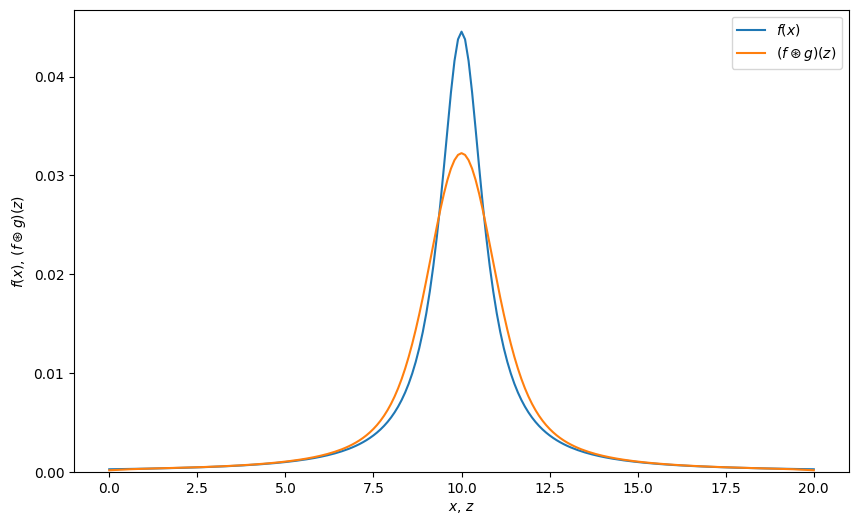

In [59]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs, zs, label='$f(x)$')
plt.plot(xs, zcs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $z$')
plt.ylabel('$f(x)$, $(f\circledast g)(z)$')
plt.ylim(0)
plt.legend()
plt.show()

In molti casi, la risoluzione sperimentale si può modellizzare come una gaussiana, ossia:

$\displaystyle g(z-x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{(z-x)^2}{2\sigma^2}\right]$

Nel limite in cui $\sigma\rightarrow 0$, $g(y-x)$ tende alla Delta di Dirac $\delta(z-x)$. In quel caso:

$\displaystyle (f\circledast g)(z) = \int_{-\infty}^{+\infty}\!\! f(x)\, \delta(z - x)\,\mathrm{d}x = f(z)$

Come c'era da aspettarsi, una risoluzione ideale non distorce il segnale.

## Convoluzione e trasformata di Fourier

La trasformata di Fourier di una funzione è definita come:
    
$\displaystyle \hat{g}(k) = \int_{-\infty}^{+\infty}\!\!g(z)\,e^{-ikz}\,\mathrm{d}z$

La trasformata inversa è invece:

$\displaystyle {g}(z) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}\!\!\hat{g}(k)\,e^{ikz}\,\mathrm{d}k$

Si può dimostrare che la trasformata della convoluzione di due PDF è data dal prodotto delle trasformate:

$\widehat{f\circledast g} = \hat{f}\cdot\hat{g}$

In particolare, la trasformata di Fourier di una gaussiana si può calcolare analiticamente. Se:

$\displaystyle g(z) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{z^2}{2\sigma^2}\right]$

allora: 

$\displaystyle \hat{g}(k) = \exp\left({-k\mu - \sigma^2 k^2/2}\right)$

In questo caso, si può usare l'algoritmo [*Fast Fourier Transform*](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) per implementare numericamente la convoluzione. 

L'implementazione in python è [```fftconvolve```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html#scipy.signal.fftconvolve), ed è conveniente se la convoluzione coinvolgere un numero molto grande di termini, riducendo la complessità da ${\cal O}(N^2)$ a ${\cal O}(N)$.

## Convoluzione di due gaussiane

Visto il risultato precedente, ma anche attraverso l'integrazione diretta, si può dimostrare che **la convoluzione di due gaussiane è ancora una gaussiana che ha come valor medio la somma dei due valori medi e come varianza la somma delle due varianza**.

Se la seconda gaussiana rappresenta un effetto di risoluzione, il secondo valor medio è nullo, quindi il valor medio risultante è quello della prima gaussiana.

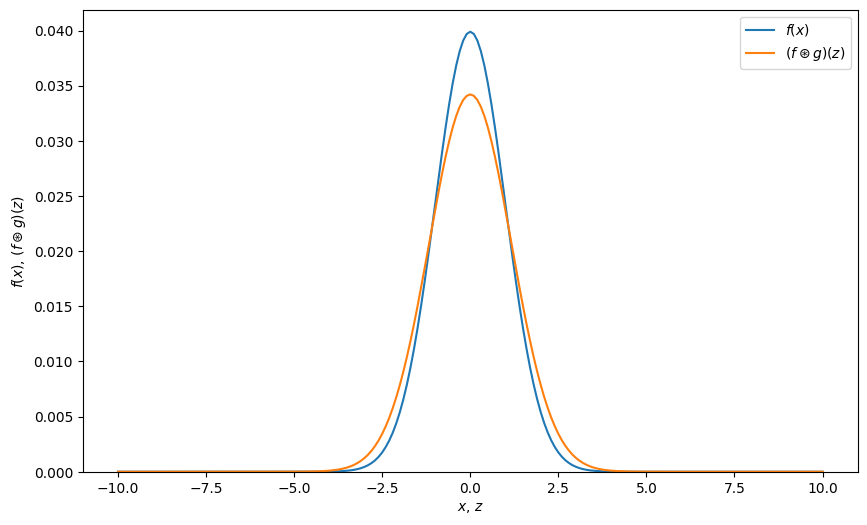

In [66]:
gamma = 1
def gaussian(x):
    return 1/math.sqrt(2*math.pi)/sigma*np.exp(-x**2/2/gamma**2)
f = gaussian
xs = np.linspace(-10, 10, 201)
zs = f(xs)
zs/=zs.sum()
zcs = np.convolve(gys, zs, 'same')
zcs/=zcs.sum()
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs, zs, label='$f(x)$')
plt.plot(xs, zcs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $z$')
plt.ylabel('$f(x)$, $(f\circledast g)(z)$')
plt.ylim(0)
plt.legend()
plt.show()

## Convoluzione e sfocatura

Nel trattamento delle immagini, la convoluzione in due dimensioni con un *kernel* gaussiano o di altro tipo corrisponde alla sfocatura dell'immagine.

# *Unfolding*

Dato uno spettro misurato, è possibile *correggere* l'effetto della convoluzione con una funzione nota. Questo problema prende il nome di *unfolding* e ha aspetti computazionali non banali. 

Il trattamento esula dallo scopo di questo corso.